In [2]:
import numpy as np
from numpy.typing import ArrayLike

def mad_clip(arr: ArrayLike, k: int = 3):
    med = np.median(arr)
    mad = np.median(np.abs(arr - med))
    
    return np.clip(arr, med - k * mad, med + k * mad)

np.random.seed(78)
arr = np.append(np.random.randint(1, 4, 20), [15, -10])
mad_clip(arr, 3)

array([2., 3., 1., 2., 3., 1., 2., 1., 1., 3., 1., 1., 1., 1., 3., 3., 1.,
       3., 1., 2., 3., 0.])

In [10]:
def mad_clip(df: Union[NDArray, pd.DataFrame], k: int = 3, axis=1):
    """使用 MAD 3 倍截断法去极值
    
    Args:
        df: 输入数据，要求索引为日期，资产名为列，单元格值为因子的宽表
        k: 截断倍数。
        axis: 截断方向
    """

    med = np.median(df, axis=axis).reshape(df.shape[0], -1)
    mad = np.median(np.abs(df - med), axis=axis)

    return np.clip(df.T, med.flatten() - k * 1.4826 * mad, med.flatten() + k * 1.4826 * mad).T

start = datetime.date(2023, 1, 1)
end = datetime.date(2023, 12, 29)
barss = load_bars(start, end, 7)

closes = barss["close"].unstack("asset").iloc[-5:]
closes

asset,002095.XSHE,003042.XSHE,300099.XSHE,301060.XSHE,601689.XSHG,603255.XSHG,688669.XSHG
date,,,,,,,
2023-12-25,23.400000,18.090000,6.10,13.00,73.910004,36.799999,18.080000
2023-12-26,21.059999,17.520000,5.94,12.83,72.879997,37.000000,18.080000
2023-12-27,20.070000,17.590000,6.04,12.84,72.000000,36.840000,18.049999
2023-12-28,20.010000,18.139999,6.11,13.14,72.199997,38.150002,18.440001
2023-12-29,20.270000,18.580000,6.19,13.29,73.500000,37.299999,18.740000


In [11]:
mad_clip(closes,k=1)

asset,002095.XSHE,003042.XSHE,300099.XSHE,301060.XSHE,601689.XSHG,603255.XSHG,688669.XSHG
date,,,,,,,
2023-12-25,23.400000,18.090000,10.217396,13.00,25.962605,25.962605,18.080000
2023-12-26,21.059999,17.520000,10.296350,12.83,25.863649,25.863649,18.080000
2023-12-27,20.070000,17.590000,10.325655,12.84,25.774343,25.774343,18.049999
2023-12-28,20.010000,18.139999,10.582220,13.14,26.297781,26.297781,18.440001
2023-12-29,20.270000,18.580000,10.659830,13.29,26.820169,26.820169,18.740000


In [13]:
def LOWRANGE(S):                       
    # LOWRANGE(LOW)表示当前最低价是近多少周期内最低价的最小值 by jqz1226
    rt = np.zeros(len(S))
    for i in range(1,len(S)):  rt[i] = np.argmin(np.flipud(S[:i]>S[i]))
    return rt.astype('int')

s = [ 1, 2, 2, 1, 3, 0]

LOWRANGE(np.array(s))

array([0, 0, 0, 2, 0, 0])

In [14]:
def min_range(s):
    """计算序列s中，元素i是此前多少个周期以来的最小值

    此方法在个别数字上有bug

    Example:
        >>> s = np.array([5, 7, 7, 6, 5, 8, 2])
        >>> min_range(s)
        array([1, 2, 1, 2, 3, 1, 6])
    """
    n = len(s)

    # handle nan
    filled = np.where(np.isnan(s), -np.inf, s)
    diff = filled[:,None] - filled
    mask = np.triu(np.ones((n, n), dtype=bool), k=1)
    masked = np.ma.array(diff, mask=mask)

    rng = np.arange(n)
    ret = rng - np.argmax(np.ma.where(masked > 0, rng, -1), axis=1)
    ret[0] = 1
    if filled[1] <= filled[0]:
        ret[1] = 2
    return ret

s = np.array([5, 7, 7, 6, 5, 8, 2])
min_range(s)

array([1, 1, 2, 3, 4, 1, 6])

In [16]:
def moving_average(ts, win: int, padding=True)->np.ndarray:
    kernel = np.ones(win) / win

    arr = np.convolve(ts, kernel, 'valid')
    if padding:
        return np.insert(arr, 0, [np.nan] * (win - 1))
    else:
        return arr

moving_average(np.arange(5), 3)

array([nan, nan,  1.,  2.,  3.])

In [21]:
def intraday_moving_average(bars: pd.DataFrame)->np.ndarray:
    acc_vol = bars["volume"].cumsum()
    acc_money = barss["amount"].cumsum()

    return acc_money / acc_vol

start = datetime.date(2023, 1, 1)
end = datetime.date(2023, 12, 29)
barss = load_bars(start, end, 1)

intraday_moving_average(barss)

date        asset      
2023-01-03  002457.XSHE    8.310465
2023-01-04  002457.XSHE    8.361222
2023-01-05  002457.XSHE    8.381415
2023-01-06  002457.XSHE    8.386454
2023-01-09  002457.XSHE    8.382696
                             ...   
2023-12-25  002457.XSHE    9.559288
2023-12-26  002457.XSHE    9.566473
2023-12-27  002457.XSHE    9.566579
2023-12-28  002457.XSHE    9.563042
2023-12-29  002457.XSHE    9.561609
Length: 241, dtype: float64

104 μs ± 2.73 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


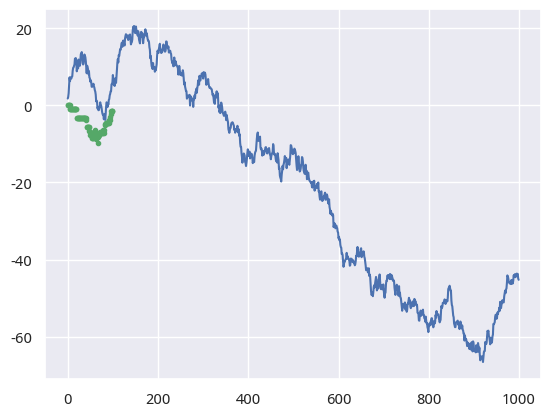

In [29]:
from numpy.lib.stride_tricks import as_strided
import matplotlib.pyplot as plt


def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y


def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    running_max_y = np.maximum.accumulate(y, axis=1)
    dd = y - running_max_y
    return dd.min(axis=1)


np.random.seed(0)
n = 100
s = np.random.randn(n).cumsum()
win = 20

mdd = rolling_max_dd(s, win, min_periods=1)

plt.plot(s, 'b')
plt.plot(mdd, 'g.')

plt.show()

In [37]:
%precision 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.random.seed(78)
s = np.random.randn(100)

hbound = np.percentile(s, 95)
lbound = np.percentile(s, 5)

s[s> hbound]
s[s< lbound]

'%.2f'

array([2.09, 2.27, 2.21, 2.12, 2.19])

array([-1.68, -2.4 , -1.97, -1.7 , -1.46])

In [33]:
s[s>1.63]

array([2.52636824, 1.76992139, 1.64850401, 1.63159743, 1.8219151 ,
       1.90506364])